In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from plotly.subplots import make_subplots



sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date,time,weekday,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,04:30:07,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
1,0.53,Lyft,North Station,Haymarket Square,27.5,1.0,Lux Black XL,2018-12-16,04:05:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
2,0.49,Uber,North Station,Haymarket Square,16.0,1.0,Black,2018-12-16,23:15:05,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
3,0.49,Uber,North Station,Haymarket Square,7.0,1.0,UberX,2018-12-16,23:15:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
4,0.49,Uber,North Station,Haymarket Square,8.0,1.0,WAV,2018-12-16,08:40:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333


In [3]:
df.isnull().sum()

distance                0
cab_type                0
destination             0
source                  0
price                   0
surge_multiplier        0
name                    0
date                    0
time                    0
weekday                 0
hour                    0
time_of_day             0
source_temp             0
source_clouds           0
source_pressure         0
source_rain             0
source_humidity         0
source_wind             0
destination_temp        0
destination_clouds      0
destination_pressure    0
destination_rain        0
destination_humidity    0
destination_wind        0
dtype: int64

In [4]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

940
0


In [5]:
df_uber = df[df['cab_type'] == "Uber"]
df_lyft = df[df['cab_type'] == "Lyft"]

# Visualization

### Analyze the relation of Surge_Multiplier and day of week for Lyft¶


In [6]:
surge_df = df_lyft[df_lyft["surge_multiplier"] >1]
high_surge = pd.DataFrame(surge_df.groupby(['weekday', "surge_multiplier"]).size().reset_index())
high_surge.columns = ["Weekday", "Surge", "Count"]

'Weekday Wise Surge Multiplier for Lyft'

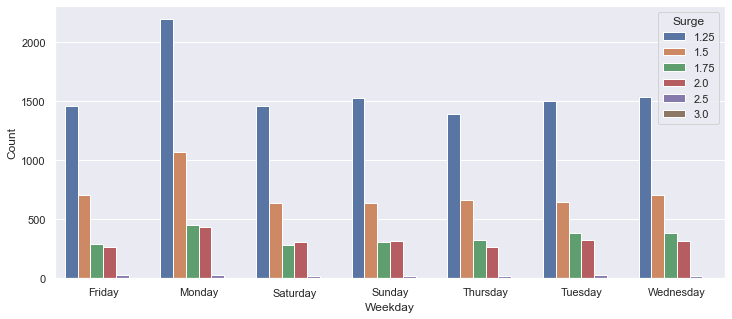

In [7]:
plt.figure(figsize = (12, 5))
sns.barplot(x="Weekday", y = "Count", hue= "Surge", data=high_surge).set_title
("Weekday Wise Surge Multiplier for Lyft")

#### We can conclude that:
1. Surge_multiplier 1.25 happens most frequently.
2. Monday is the day that customer most likely to encounter it.
3. Surge_multiplier 3.0 is very unlikely to happen.

In [8]:
cond_raining = df['source_rain'] > 0
df_rain = df[cond_raining] 
df_rain.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date,time,weekday,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,04:30:07,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
1,0.53,Lyft,North Station,Haymarket Square,27.5,1.0,Lux Black XL,2018-12-16,04:05:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
2,0.49,Uber,North Station,Haymarket Square,16.0,1.0,Black,2018-12-16,23:15:05,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
3,0.49,Uber,North Station,Haymarket Square,7.0,1.0,UberX,2018-12-16,23:15:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333
4,0.49,Uber,North Station,Haymarket Square,8.0,1.0,WAV,2018-12-16,08:40:09,Sunday,...,1017.206667,0.014621,0.775,9.199167,40.705,0.81625,1017.227917,0.014917,0.776667,9.158333


In [22]:
cond_distance = df_rain['distance'].isin([0.5, 1, 1.5, 2, 2.5, 3])
df_data = df_rain[cond_distance]
cond_uber = df_data['name'] == 'UberPool' 
cond_lyft = df_data['name'] == 'Shared' 
df_data = df_data[cond_uber | cond_lyft]
df_data = df_data.sort_values(by='distance')


fig = px.scatter(df_data, x="source_rain", y="price", color="cab_type", hover_data=['distance', 'name'], 
                 animation_frame = 'distance', color_discrete_map={'Lyft': '#FF00BF','Uber':'#000000'})
fig["layout"].pop("updatemenus")
fig.show()

In [10]:
df_lyft = df_lyft.groupby("name")['distance'].count()
df_lyft = df_lyft.reset_index()
df_lyft.head()

,name,distance
0,Lux,51204
1,Lux Black,51188
2,Lux Black XL,51209
3,Lyft,51196
4,Lyft XL,51189


In [11]:
df_uber = df_uber.groupby("name")['distance'].count()
df_uber = df_uber.reset_index()
df_uber.head()

,name,distance
0,Black,54971
1,Black SUV,54982
2,UberPool,54980
3,UberX,54952
4,UberXL,55005


In [12]:
cab_type = ["Lyft", "Lyft", "Lyft", "Lyft", "Lyft", "Lyft", "Uber", "Uber", "Uber","Uber" ,"Uber" ,"Uber"]
name = []
amount = []

values = list(df_lyft['name'].values)
name = name + values
values = list(df_lyft['distance'].values)
amount = amount + values

values = list(df_uber['name'].values)
name = name + values
values = list(df_uber['distance'].values)
amount = amount + values

len(cab_type), len(name), len(amount),

(12, 12, 12)

In [13]:
data = {"cab_type":cab_type, "name":name, "amount": amount }
df_amount = pd.DataFrame(data=data)
df_amount

,cab_type,name,amount
0,Lyft,Lux,51204
1,Lyft,Lux Black,51188
2,Lyft,Lux Black XL,51209
3,Lyft,Lyft,51196
4,Lyft,Lyft XL,51189
5,Lyft,Shared,51205
6,Uber,Black,54971
7,Uber,Black SUV,54982
8,Uber,UberPool,54980
9,Uber,UberX,54952


In [14]:
fig = px.bar(df_amount, x="cab_type", y="amount", color="name", title="Long-Form Input")
fig.show()

In [15]:
df_rain.date.value_counts()

2018-11-28    86777
2018-11-27    58098
2018-11-26    43957
2018-12-17    41322
2018-12-16    41288
2018-12-02    41254
2018-12-03    41158
2018-11-29    37332
2018-11-30    31367
2018-12-18    24700
2018-12-15     3332
Name: date, dtype: int64

In [16]:
df.date.value_counts()

2018-11-28    86777
2018-11-27    58098
2018-11-26    43957
2018-11-30    41769
2018-12-14    41351
2018-12-01    41347
2018-12-17    41322
2018-12-16    41288
2018-12-15    41278
2018-12-02    41254
2018-12-13    41195
2018-12-03    41158
2018-11-29    41015
2018-12-18    24700
2018-12-09     4052
2018-12-04     3138
2018-12-12     2870
2018-11-25      467
Name: date, dtype: int64

In [17]:
df_rides_rain = df_rain.groupby(['cab_type', 'date']).size().reset_index()
df_rides_rain.head()

,cab_type,date,0
0,Lyft,2018-11-26,21161
1,Lyft,2018-11-27,28064
2,Lyft,2018-11-28,41946
3,Lyft,2018-11-29,17701
4,Lyft,2018-11-30,15293


In [18]:
df_rides_rain = df_rides_rain.rename(columns={0: "amount"})
df_rides_rain.head()

,cab_type,date,amount
0,Lyft,2018-11-26,21161
1,Lyft,2018-11-27,28064
2,Lyft,2018-11-28,41946
3,Lyft,2018-11-29,17701
4,Lyft,2018-11-30,15293


In [19]:
fig = px.bar(df_rides_rain, 
                 x='cab_type', y='amount', 
                 color = 'cab_type',
                 color_discrete_map={'Lyft': '#FF00BF','Uber':'#000000'},
                 width = 500, height = 500,
                 animation_frame = 'date'
                )
fig["layout"].pop("updatemenus")

fig.show()

In [35]:
df_uber2 = df[df['cab_type'] == "Uber"]
df_lyft2 = df[df['cab_type'] == "Lyft"]

In [36]:
df_uber2 = df_uber2.groupby(['name', 'distance'])['price'].mean().reset_index()
df_uber2

,name,distance,price
0,Black,0.02,15.000000
1,Black,0.03,15.264706
2,Black,0.04,15.000000
3,Black,0.12,15.000000
4,Black,0.17,16.000000
...,...,...,...
2527,WAV,7.45,16.000000
2528,WAV,7.46,16.731111
2529,WAV,7.50,17.333333
2530,WAV,7.62,17.000000


In [37]:
fig = px.line(df_uber2, x='distance', y='price', color='name')
fig.show()

In [38]:
df_lyft2 = df_lyft2.groupby(['name', 'distance'])['price'].mean().reset_index()
df_lyft2

,name,distance,price
0,Lux,0.39,10.930233
1,Lux,0.40,10.740000
2,Lux,0.41,11.000000
3,Lux,0.42,11.243902
4,Lux,0.43,10.769697
...,...,...,...
3073,Shared,6.09,10.500000
3074,Shared,6.12,12.000000
3075,Shared,6.13,11.000000
3076,Shared,6.14,10.500000


In [39]:
fig = px.line(df_lyft2, x='distance', y='price', color='name')
fig.show()